In [20]:
import numpy as np
from osgeo import gdal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
rst = r'C:\Users\14000901\Downloads\Python Hari 3\machine_learning_crop.tif'
roi = r'C:\Users\14000901\Downloads\Python Hari 3\roi_reclass4.tif'

In [3]:
df = pd.read_csv(r'C:\Users\14000901\Downloads\Python Hari 3\roi_table2.csv')

In [4]:
#Show CSV
print(df)

      Unnamed: 0  kelas        b1        b2        b3        b4        b5
0              1      7  0.017591  0.051680  0.019392  0.171532  0.679210
1              2      7  0.029223  0.065119  0.025209  0.193695  0.719920
2              3      7  0.033304  0.065613  0.028556  0.210776  0.750461
3              4      7  0.025036  0.055213  0.021697  0.161680  0.694942
4              5      7  0.019405  0.044860  0.019066  0.151767  0.675532
...          ...    ...       ...       ...       ...       ...       ...
3518        3519      7  0.036567  0.103845  0.030180  0.281829  0.830187
3519        3520      7  0.026290  0.094255  0.025993  0.294352  0.817990
3520        3521      7  0.019836  0.074599  0.018653  0.242213  0.763631
3521        3522      7  0.022379  0.078908  0.019093  0.210398  0.723960
3522        3523      7  0.022892  0.082088  0.020729  0.242701  0.798822

[3523 rows x 7 columns]


In [5]:
data = df[['b1','b2','b3','b4','b5']]
label = df['kelas'].astype(int)

In [6]:
#Open Raster
ds=gdal.Open(rst, gdal.GA_ReadOnly)

In [7]:
rows=ds.RasterYSize
cols = ds.RasterXSize
bands = ds.RasterCount
geo_transform = ds.GetGeoTransform()
projection = ds.GetProjectionRef()

In [8]:
#read as array
array = ds.ReadAsArray()
array = np.stack(array,axis=2)
array = np.reshape(array, [rows*cols,bands])
print(array)

[[0.02084229 0.0822311  0.02865321 0.27040273 0.63533825]
 [0.02572505 0.08428513 0.02583015 0.27124527 0.6243448 ]
 [0.02284617 0.07595293 0.02352427 0.25915954 0.628262  ]
 ...
 [0.0202383  0.0521137  0.02943511 0.12825035 0.40651378]
 [0.02217216 0.05712281 0.03017107 0.15719417 0.48613316]
 [0.02348092 0.05826678 0.02985129 0.18179667 0.5822903 ]]


In [9]:
test = pd.DataFrame(array, dtype='float32')

In [10]:
clf = RandomForestClassifier(n_estimators=50,n_jobs=-1) #-1 semua core, 1 = 1 core
clf.fit(data,label)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [11]:
y_pred = clf.predict(test)
classification = y_pred.reshape((rows,cols))

C:\ProgramData\Miniconda3\envs\Nuril\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
outRaster = 'classified.tif'
def createGeotiff(outRaster, data, geo_transform, projection):
    # Create a GeoTIFF file with the given data
    driver = gdal.GetDriverByName('GTiff')
    rows, cols = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, 1, gdal.GDT_Int32)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    band = rasterDS.GetRasterBand(1)
    band.WriteArray(data)
    rasterDS = None

In [25]:
hasil=createGeotiff(outRaster,classification,geo_transform,projection)

In [29]:
#plt.imshow()

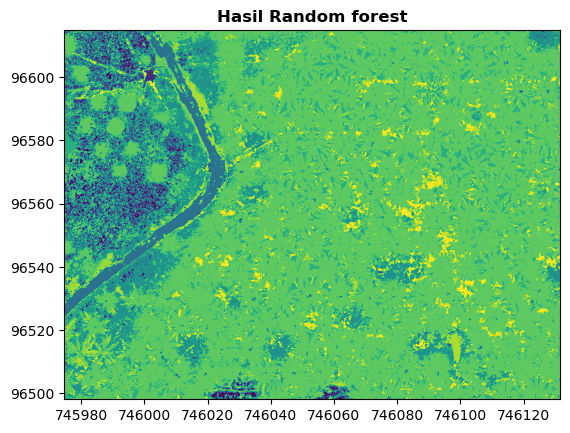

In [28]:
#Open Tif With Rasterio
import rasterio
import rasterio.plot

tiff = rasterio.open(outRaster)
rasterio.plot.show(tiff, title = "Hasil Random forest");